In [8]:
import os
os.chdir("/Users/alessandro/Projects/PythonProjects/Repos/prosperity-algo-trading")
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statistics as stat
import math
import typing
import jsonpickle as jp

In [3]:
df = pd.read_csv("tutorial_data.csv", header=2)
df.columns = df.columns.str.strip('"')
df = df.map(lambda x: x.strip('"') if isinstance(x, str) else x)
df.head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.0
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.92529296875
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134765625
5,-2,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,-6.0
6,-2,300,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,-6.0
7,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,-3.1005859375
8,-2,400,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,-14.0
9,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,-0.1796875


In [4]:
df_amethysts = df[df['product'] == 'AMETHYSTS']
df_amethysts.reset_index(drop=True, inplace=True)
df_amethysts

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.0
2,-2,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,-6.0
3,-2,300,AMETHYSTS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,-6.0
4,-2,400,AMETHYSTS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,-14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2,199500,AMETHYSTS,10002,1,9996.0,1.0,9995.0,22.0,10004,1,10005.0,22.0,NaN,NaN,10003.0,-48.0
1996,-2,199600,AMETHYSTS,9996,1,9995.0,21.0,NaN,NaN,10002,7,10004.0,1.0,10005.0,21.0,9999.0,-48.0
1997,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,-48.0
1998,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,-48.0


In [57]:
df_starfruit = df[df['product'] == 'STARFRUIT']
df_starfruit.reset_index(drop=True, inplace=True)
df_starfruit

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.0
1,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.92529296875
2,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134765625
3,-2,300,STARFRUIT,4996,31,NaN,NaN,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,4999.5,-3.1005859375
4,-2,400,STARFRUIT,4995,27,NaN,NaN,NaN,NaN,5002,27,NaN,NaN,NaN,NaN,4998.5,-0.1796875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-2,199500,STARFRUIT,4949,23,NaN,NaN,NaN,NaN,4956,23,NaN,NaN,NaN,NaN,4952.5,908.2265625
1996,-2,199600,STARFRUIT,4949,22,NaN,NaN,NaN,NaN,4956,22,NaN,NaN,NaN,NaN,4952.5,911.5
1997,-2,199700,STARFRUIT,4949,27,NaN,NaN,NaN,NaN,4956,27,NaN,NaN,NaN,NaN,4952.5,910.9296875
1998,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,904.4296875


# Plots

<Axes: >

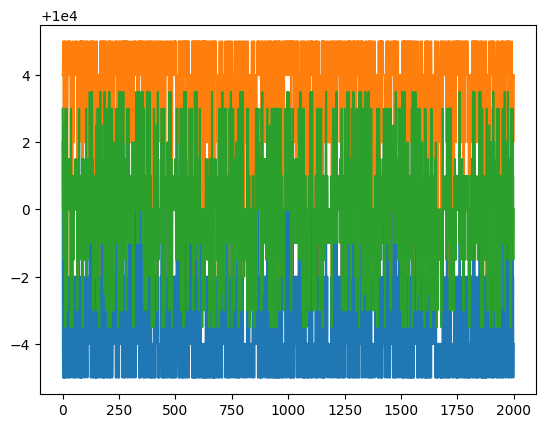

In [6]:
df_amethysts['bid_price_1'].plot()
df_amethysts['ask_price_1'].plot()
df_amethysts['mid_price'].plot()

In [40]:
for i in range(1,11):
    sma = df_starfruit['mid_price'].rolling(window=i).mean()
    sma = sma.shift(1)
    mse = np.mean((sma - df_starfruit['mid_price'])**2)
    print("Mean squared error SMA","(", i, ")", ":", mse)

sma = df_starfruit['mid_price'].rolling(window=5).mean()

Mean squared error SMA ( 1 ) : 2.780015007503752
Mean squared error SMA ( 2 ) : 2.2073323323323324
Mean squared error SMA ( 3 ) : 1.9763812385244637
Mean squared error SMA ( 4 ) : 1.9091699023046091
Mean squared error SMA ( 5 ) : 1.8809223057643982
Mean squared error SMA ( 6 ) : 1.8874644767636337
Mean squared error SMA ( 7 ) : 1.9063891989309756
Mean squared error SMA ( 8 ) : 1.9333211753263053
Mean squared error SMA ( 9 ) : 1.947408399526289
Mean squared error SMA ( 10 ) : 1.9651922110552578


In [59]:
lagged_df

,lag_1,lag_2,lag_3,lag_4,lag_5
5,4998.5,4999.5,5000.0,5000.0,5002.5
6,4999.5,4998.5,4999.5,5000.0,5000.0
7,5001.0,4999.5,4998.5,4999.5,5000.0
8,5000.0,5001.0,4999.5,4998.5,4999.5
9,5000.0,5000.0,5001.0,4999.5,4998.5
...,...,...,...,...,...
1995,4949.5,4951.5,4954.0,4950.5,4951.0
1996,4952.5,4949.5,4951.5,4954.0,4950.5
1997,4952.5,4952.5,4949.5,4951.5,4954.0
1998,4952.5,4952.5,4952.5,4949.5,4951.5


In [61]:
df_starfruit['mid_price'].head(10)

0    5002.5
1    5000.0
2    5000.0
3    4999.5
4    4998.5
5    4999.5
6    5001.0
7    5000.0
8    5000.0
9    5000.0
Name: mid_price, dtype: float64

In [72]:
import statsmodels.api as sm

for i in range(1,20):
    
    # Define the window size
    window = i

    # Create a separate DataFrame for lagged features
    lagged_df = pd.DataFrame()
    for i in range(1, window+1):
        lagged_df[f'lag_{i}'] = df_starfruit['mid_price'].shift(i)

    # Drop rows with NaN resulting from the lagged features
    lagged_df.dropna(inplace=True)

    # Define the target variable
    y = df_starfruit['mid_price'].iloc[window:]

    # Define the features (lagged prices)
    X = lagged_df[[f'lag_{i}' for i in range(1, window+1)]]

    # Add constant to the features
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    predictions = model.predict(X)

    mse = np.mean((predictions - df_starfruit['mid_price'])**2)
    print("Mean squared error LR","(", i, ")", ":", mse)


Mean squared error LR ( 1 ) : 2.7709012616089406
Mean squared error LR ( 2 ) : 2.198615260424627
Mean squared error LR ( 3 ) : 1.963941611876989
Mean squared error LR ( 4 ) : 1.8905342307672013
Mean squared error LR ( 5 ) : 1.8499084072594771
Mean squared error LR ( 6 ) : 1.8367741255309253
Mean squared error LR ( 7 ) : 1.8293508278809174
Mean squared error LR ( 8 ) : 1.8265500963559096
Mean squared error LR ( 9 ) : 1.816185353698316
Mean squared error LR ( 10 ) : 1.8106506223739356
Mean squared error LR ( 11 ) : 1.8103245709918572
Mean squared error LR ( 12 ) : 1.8090074125598012
Mean squared error LR ( 13 ) : 1.8076769965368777
Mean squared error LR ( 14 ) : 1.808013254211297
Mean squared error LR ( 15 ) : 1.8088269794886436
Mean squared error LR ( 16 ) : 1.8066168581312552
Mean squared error LR ( 17 ) : 1.8053471289073644
Mean squared error LR ( 18 ) : 1.805315393848007
Mean squared error LR ( 19 ) : 1.8059839681603354


In [90]:
# Define the window size
window = 7

# Create a separate DataFrame for lagged features
lagged_df = pd.DataFrame()
for i in range(1, window+1):
    lagged_df[f'lag_{i}'] = df_starfruit['mid_price'].shift(i)

# Drop rows with NaN resulting from the lagged features
lagged_df.dropna(inplace=True)

# Define the target variable
y = df_starfruit['mid_price'].iloc[window:]

# Define the features (lagged prices)
X = lagged_df[[f'lag_{i}' for i in range(1, window+1)]]

# Add constant to the features
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

LR = model.predict(X)


In [91]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mid_price   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.117e+04
Date:                Fri, 05 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:20:58   Log-Likelihood:                -3429.8
No. Observations:                1993   AIC:                             6876.
Df Residuals:                    1985   BIC:                             6920.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3271     10.675     -0.031      0.976     -21.262      20.608
lag_1          0.2835      0.022     12.659      0.000       0.240       0.327
lag_2          0.1671      0.023      7.194      0.000       0.122       0.213
lag_3          0.1918      0.023      8.199      0.000       0.146       0.238
lag_4          0.1179      0.024      4.985      0.000       0.071       0.164
lag_5          0.1085      0.023      4.635      0.000       0.063       0.154
lag_6          0.0677      0.023      2.912      0.004       0.022       0.113
lag_7          0.0636      0.022      2.837      0.005       0.020       0.107
==============================================================================
Omnibus:                       52.108   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.488
Skew:                          -0.114   Prob(JB):                     6.18e-25
Kurtosis:                       4.136   Cond. No.                     4.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

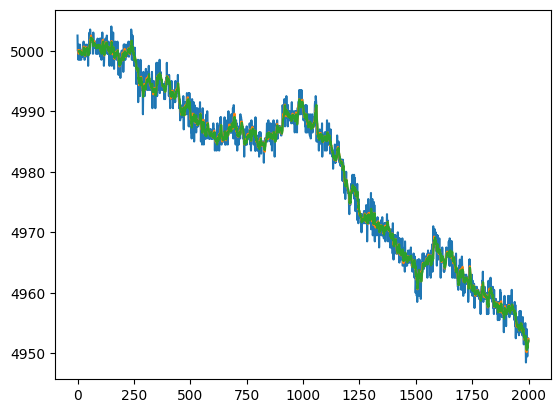

In [92]:
#df_starfruit['bid_price_1'].plot()
#df_starfruit['ask_price_1'].plot()
df_starfruit['mid_price'].plot()
sma.plot()
LR.plot()

#plt.xlim([100,200])
